# Tópicos Avanzados de Estadística

## Tarea: Manipulación de datos con Pandas


### Presentado por: 
- Miguel Ángel Quintero

In [1]:
import pandas as pd
!pip install pandasql
import pandasql as ps
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
Municipios = pd.read_excel("Datos\Municipios.xlsx",dtype={'Dep': str, 'Depmun': str, 'Irural': float, 'Poblacion': float})
Municipios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 8 columns):
Departamento    1118 non-null object
Dep             1118 non-null object
Municipio       1118 non-null object
Depmun          1118 non-null object
Superficie      1117 non-null float64
Poblacion       1118 non-null float64
Irural          1118 non-null float64
Region          1118 non-null object
dtypes: float64(3), object(5)
memory usage: 70.0+ KB


**Ejemplo 1**

Cuales variables del conjunto de datos Municipios tienen valores perdidos o missings?

In [3]:
def missings(x):
            a = x.isna().sum()
            b = 100*x.isna().mean()
            c = pd.Series({"Missings": a,"%Missings": b})
            return(c)

Municipios.apply(missings)

,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region
Missings,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
%Missings,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00


**Ejemplo 2**

Se hace "limpieza" en los nombres de los municipios, es decir,

- Se eliminan caracteres especiales
- Se eliminan espacios al inicio y al final
- Se reemplazan espacios múltiples por sencillos
- Se escriben en letras minúsculas excepto en la inicial de cada palabra

In [4]:
Municipios["Municipio2"] = (Municipios["Municipio"]
                            .str.lower()
                            .str.replace("[^a-záéíóúüñ ]","")
                            .str.replace(" +"," ")
                            .str.strip()
                            .str.title()
                           ) 
print(Municipios[["Municipio","Municipio2"]])

Municipios["Municipio"] = Municipios["Municipio2"]
Municipios = Municipios.drop(columns="Municipio2")

                     Municipio      Municipio2
0                   Mede&l'lín        Medellín
1                Abej!&orr*al        Abejorral
2                 A?br'&iaquí         Abriaquí
3                Alej#andr&'ía      Alejandría
4                   Am#a?&'*gá           Amagá
...                        ...             ...
1113            Y#*ava'ra?t!é         Yavaraté
1114     Puerto   Carr#eño'     Puerto Carreño
1115         La Prima&*'!ve#ra    La Primavera
1116          Santa   ?Rosalía   Santa Rosalía
1117              C#u'?mar!ibo        Cumaribo

[1118 rows x 2 columns]


**Ejemplo 3**

Se hace "limpieza" en los nombres de los departamentos, es decir,

- Se eliminan caracteres especiales
- Se eliminan espacios al inicio y al final
- Se reemplazan espacios múltiples por sencillos
- Se escriben en letras minúsculas excepto en la inicial de cada palabra

In [5]:
Municipios["Departamento2"] = (Municipios["Departamento"]
                               .str.lower()
                               .str.replace("[^a-záéíóúüñ ]","")
                               .str.replace(" +"," ")
                               .str.strip()
                               .str.title()
                              ) 
print(Municipios[["Departamento","Departamento2"]])

Municipios["Departamento"] = Municipios["Departamento2"]
Municipios = Municipios.drop(columns="Departamento2")

      Departamento Departamento2
0       Ant%ioqUia     Antioquia
1       Ant%ioquia     Antioquia
2       Ant%ioquia     Antioquia
3      Ant%io>qUia     Antioquia
4        Antioquia     Antioquia
...            ...           ...
1113       Vaup>és        Vaupés
1114     Vi%ch>ada       Vichada
1115       Vichada       Vichada
1116     Vi%ch>ada       Vichada
1117    Vichada          Vichada

[1118 rows x 2 columns]


**Ejemplo 4**

Se crea la variable Tipo igual a "Capital" para la capital de cada departamento y "Otro" para el resto de los municipios.

In [6]:
def tipo(x): 
    if x[2:5]=="001" and x!="25001": return("Capital")
    else: return("Otros")
Municipios["Tipo"] = Municipios["Depmun"].apply(tipo)

Municipios.query("Tipo=='Capital'")

,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region,Tipo
0,Antioquia,05,Medellín,05001,374.83,"2,483,545.00",5.00,Región Eje Cafetero,Capital
125,Atlántico,08,Barranquilla,08001,154.20,"1,243,056.00",3.00,Región Caribe,Capital
148,Bogotá D C,11,Bogotá D C,11001,"1,622.85","7,592,871.00",6.00,Región Centro Oriente,Capital
149,Bolívar,13,Cartagena,13001,597.68,"1,003,685.00",18.00,Región Caribe,Capital
194,Boyacá,15,Tunja,15001,119.69,"176,347.00",20.00,Región Centro Oriente,Capital
317,Caldas,17,Manizales,17001,441.00,"440,608.00",20.00,Región Eje Cafetero,Capital
344,Caquetá,18,Florencia,18001,"2,547.64","170,764.00",46.00,Región Centro Sur,Capital
360,Cauca,19,Popayán,19001,480.18,"321,991.00",27.00,Región Pacífico,Capital
401,Cesar,20,Valledupar,20001,"4,185.79","513,685.00",40.00,Región Caribe,Capital
426,Córdoba,23,Montería,23001,"3,136.59","498,858.00",39.00,Región Caribe,Capital


**Ejemplo 5**

Se crea la variable denspobl definida como el cociente entre Poblacion y Superficie. Se crea también la variable Zona igual a "Urbano" cuando Irural  <=40  y "Rural" cuando Irural  >40 .

In [7]:
Municipios["denspobl"] = Municipios["Poblacion"]/Municipios["Superficie"]

def zona(x): 
    if x  > 40: return("Rural")
    if x <= 40: return("Urbano")
Municipios["Zona"] = Municipios["Irural"].apply(zona)

Municipios.head()

,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region,Tipo,denspobl,Zona
0,Antioquia,05,Medellín,05001,374.83,"2,483,545.00",5.00,Región Eje Cafetero,Capital,"6,625.78",Urbano
1,Antioquia,05,Abejorral,05002,507.13,"20,258.00",45.00,Región Eje Cafetero,Otros,39.95,Rural
2,Antioquia,05,Abriaquí,05004,296.96,"2,710.00",58.00,Región Eje Cafetero,Otros,9.13,Rural
3,Antioquia,05,Alejandría,05021,128.93,"4,669.00",48.00,Región Eje Cafetero,Otros,36.21,Rural
4,Antioquia,05,Amagá,05030,84.13,"30,777.00",28.00,Región Eje Cafetero,Otros,365.82,Urbano


**Ejemplo 6**

Cálculo de algunas estadísticas descriptivas para las variables numéricas en el conjunto de datos Municipios.

In [8]:
Municipios.describe()

,Superficie,Poblacion,Irural,denspobl
count,"1,117.00","1,118.00","1,118.00","1,117.00"
mean,"1,020.43","44,095.63",46.78,165.34
std,"3,217.70","260,344.32",12.70,733.12
min,15.84,288.00,0.00,0.07
25%,132.76,"6,614.00",40.00,21.43
50%,287.04,"12,796.50",46.00,44.89
75%,704.10,"27,501.75",52.00,93.37
max,"65,597.21","7,592,871.00",100.00,"14,442.77"


**Ejemplo 7**

Cálculo de algunas estadísticas descriptivas (personalizadas) para las variables numéricas en el conjunto de datos Municipios.

In [9]:
def summary(y):
    def numer(x):
        a = x.mean()
        b = x.std()
        c = x.median()
        d = x.skew()
        e = x.kurt()
        f = pd.Series({"Mean":a,"St.dev":b,"Median":c,"Skewness":d,"Kurtosis":e})
        return(f)
    numerics = y._get_numeric_data()
    if len(numerics.columns) > 0: return(numerics.apply(numer))

summary(Municipios)

,Superficie,Poblacion,Irural,denspobl
Mean,"1,020.43","44,095.63",46.78,165.34
St.dev,"3,217.70","260,344.32",12.70,733.12
Median,287.04,"12,796.50",46.00,44.89
Skewness,10.85,23.38,0.70,12.33
Kurtosis,174.83,645.49,3.34,190.09


## Tablas de frecuencia

In [10]:
from mismacrospython import onewayfreq, twowayfreq

**Ejemplo 1**

Qué porcentaje del total representan los municipios del departamento de Norte de Santander? Cuantos municipios tiene el departamento del Valle del Cauca? Cuales son los cinco departamentos con mayor número de municipios? Qué porcentaje del total representan los municipios de estos cinco departamentos? Qué porcentaje de los municipios son rurales?

In [11]:
onewayfreq(rows="Departamento",data=Municipios,ord="freq")  

,Departamento,Frequency,Percent,CumulativeFrequency,CumulativePercent
0,Antioquia,125,11.18,125,11.18
1,Boyacá,123,11.00,248,22.18
2,Cundinamarca,116,10.38,364,32.56
3,Santander,87,7.78,451,40.34
4,Nariño,64,5.72,515,46.06
5,Tolima,47,4.20,562,50.27
6,Bolívar,45,4.03,607,54.29
7,Valle Del Cauca,42,3.76,649,58.05
8,Cauca,41,3.67,690,61.72
9,Norte De Santander,40,3.58,730,65.30


In [12]:
onewayfreq(rows="Zona",data=Municipios,cum=False)

,Zona,Frequency,Percent
0,Rural,822,73.52
1,Urbano,296,26.48


**Ejemplo 2**

Qué porcentaje de la población habita en el departamento del Meta? Cuantos habitantes tiene el departamento del Putumayo? Cuales son los cuatro departamentos con mayor número de habitantes? Qué porcentaje de la población habita en estos cuatro departamentos? Qué porcentaje de la población habita en municipios rurales?

In [13]:
onewayfreq(rows="Departamento",weight="Poblacion",data=Municipios,ord="freq")

,Departamento,Frequency,Percent,CumulativeFrequency,CumulativePercent
0,Bogotá D C,"7,592,871.00",15.40,"7,592,871.00",15.40
1,Antioquia,"6,550,206.00",13.29,"14,143,077.00",28.69
2,Valle Del Cauca,"4,506,768.00",9.14,"18,649,845.00",37.83
3,Cundinamarca,"3,085,522.00",6.26,"21,735,367.00",44.09
4,Atlántico,"2,638,151.00",5.35,"24,373,518.00",49.44
5,Santander,"2,237,587.00",4.54,"26,611,105.00",53.98
6,Bolívar,"2,120,925.00",4.30,"28,732,030.00",58.28
7,Córdoba,"1,741,111.00",3.53,"30,473,141.00",61.81
8,Nariño,"1,628,981.00",3.30,"32,102,122.00",65.12
9,Norte De Santander,"1,565,362.00",3.18,"33,667,484.00",68.29


In [14]:
onewayfreq(rows="Zona",weight="Poblacion",data=Municipios,cum=False)  

,Zona,Frequency,Percent
0,Rural,"14,152,533.00",28.71
1,Urbano,"35,146,380.00",71.29


**Ejemplo 3**

Cuales son los cinco municipios más/menos poblados del departamento de Bolívar? Qué porcentaje representan estos municipios del total de la población en el departamento? Qué porcentaje de la población del departamento habita en municipios rurales?

In [15]:
onewayfreq(rows="Municipio",weight="Poblacion",data=Municipios,subset="Dep=='13'",ord="freq")

,Municipio,Frequency,Percent,CumulativeFrequency,CumulativePercent
0,Cartagena,"1,003,685.00",47.32,"1,003,685.00",47.32
1,Magangué,"137,030.00",6.46,"1,140,715.00",53.78
2,Turbaco,"109,813.00",5.18,"1,250,528.00",58.96
3,Arjona,"71,837.00",3.39,"1,322,365.00",62.35
4,El Carmen De Bolívar,"71,428.00",3.37,"1,393,793.00",65.72
5,María La Baja,"47,389.00",2.23,"1,441,182.00",67.95
6,Mompós,"45,498.00",2.15,"1,486,680.00",70.10
7,San Juan Nepomuceno,"37,765.00",1.78,"1,524,445.00",71.88
8,Santa Rosa Del Sur,"33,701.00",1.59,"1,558,146.00",73.47
9,Mahates,"28,602.00",1.35,"1,586,748.00",74.81


In [16]:
onewayfreq(rows="Zona",weight="Poblacion",data=Municipios,subset="Dep=='13'",cum=False)

,Zona,Frequency,Percent
0,Rural,"653,793.00",30.83
1,Urbano,"1,467,132.00",69.17


**Ejemplo 4**

Qué porcentaje de la superficie total de Colombia representa el departamento del Chocó? Cual es la superficie del departamento de Córdoba? Cuales son los cinco departamentos con mayor/menor superficie? Qué porcentaje representan estos cinco departamentos de la superficie total de Colombia?

In [17]:
onewayfreq(rows="Departamento",weight="Superficie",data=Municipios,ord="freq") 

,Departamento,Frequency,Percent,CumulativeFrequency,CumulativePercent
0,Amazonas,"109,497.05",9.61,"109,497.05",9.61
1,Vichada,"100,063.37",8.78,"209,560.42",18.39
2,Caquetá,"90,103.01",7.91,"299,663.43",26.29
3,Meta,"85,527.29",7.50,"385,190.72",33.79
4,Guainía,"71,289.35",6.25,"456,480.08",40.05
5,Antioquia,"62,804.71",5.51,"519,284.79",45.56
6,Guaviare,"55,575.23",4.88,"574,860.02",50.43
7,Vaupés,"53,299.28",4.68,"628,159.30",55.11
8,Chocó,"48,353.22",4.24,"676,512.52",59.35
9,Casanare,"44,394.24",3.89,"720,906.76",63.25


In [18]:
onewayfreq(rows="Departamento",weight="Superficie",data=Municipios,ord="-freq")

,Departamento,Frequency,Percent,CumulativeFrequency,CumulativePercent
0,San Andrés,49.42,0.00,49.42,0.00
1,Bogotá D C,"1,622.85",0.14,"1,672.28",0.15
2,Quindío,"1,933.57",0.17,"3,605.85",0.32
3,Atlántico,"3,315.75",0.29,"6,921.60",0.61
4,Risaralda,"3,556.77",0.31,"10,478.37",0.92
5,Caldas,"7,425.22",0.65,"17,903.60",1.57
6,Sucre,"10,591.85",0.93,"28,495.44",2.50
7,Huila,"18,141.66",1.59,"46,637.10",4.09
8,La Guajira,"20,621.96",1.81,"67,259.06",5.90
9,Valle Del Cauca,"20,665.54",1.81,"87,924.61",7.71


**Ejemplo 5**

Qué porcentaje de los municipios del departamento de La Guajira son rurales? Qué porcentaje de los municipios rurales están en el departamento de Vaupés?

In [19]:
twowayfreq(rows="Departamento",columns="Zona",data=Municipios,ord="freq",rowpercent=True,colpercent=True)

Frequency
Row percent
Col percent
 


,Departamento / Zona,Rural,Urbano,Total
,,,,
0,Antioquia,86.00,39.00,125.00
1,,68.80,31.20,100.00
2,,10.46,13.18,11.18
3,Boyacá,98.00,25.00,123.00
4,,79.67,20.33,100.00
...,...,...,...,...
97,,0.00,100.00,100.00
98,,0.00,0.34,0.09
99,Total,822.00,296.00,"1,118.00"


**Ejemplo 6**

Qué porcentaje de la población del departamento de Boyacá está en municipios rurales? Qué porcentaje de la población total en municipios rurales está en el departamento de Antioquia?

In [20]:
twowayfreq(rows="Departamento",columns="Zona",weight="Poblacion",data=Municipios,ord="freq")

Frequency
 


,Departamento / Zona,Rural,Urbano,Total
,,,,
0,Bogotá D C,0.00,"7,592,871.00","7,592,871.00"
1,Antioquia,"1,591,938.00","4,958,268.00","6,550,206.00"
2,Valle Del Cauca,"550,147.00","3,956,621.00","4,506,768.00"
3,Cundinamarca,"529,770.00","2,555,752.00","3,085,522.00"
4,Atlántico,"73,010.00","2,565,141.00","2,638,151.00"
5,Santander,"638,415.00","1,599,172.00","2,237,587.00"
6,Bolívar,"653,793.00","1,467,132.00","2,120,925.00"
7,Córdoba,"813,722.00","927,389.00","1,741,111.00"
8,Nariño,"757,725.00","871,256.00","1,628,981.00"


**Ejemplo 7**

Qué porcentaje de la superficie del departamento de Nariño corresponde a municipios rurales? Qué porcentaje de la superficie total en municipios rurales está en el departamento de Atlántico?

In [21]:
twowayfreq(rows="Departamento",columns="Zona",weight="Superficie",data=Municipios,ord="freq")

Frequency
 


,Departamento / Zona,Rural,Urbano,Total
,,,,
0,Amazonas,"109,497.05",0.00,"109,497.05"
1,Vichada,"100,063.37",0.00,"100,063.37"
2,Caquetá,"90,103.01",0.00,"90,103.01"
3,Meta,"83,893.10","1,634.19","85,527.29"
4,Guainía,"71,289.35",0.00,"71,289.35"
5,Antioquia,"56,151.07","6,653.64","62,804.71"
6,Guaviare,"55,575.23",0.00,"55,575.23"
7,Vaupés,"53,299.28",0.00,"53,299.28"
8,Chocó,"48,353.22",0.00,"48,353.22"


# Consulta, transformación y creación de conjuntos de datos
### Libreria pandasql

**Ejemplo 1**

data.frame con las variables Departamento, Dep, Depmun, Municipio, Superficie y Poblacion que incluye todos los municipios de los departamentos de Antioquia y Caldas con más de 20 mil habitantes y donde los mismos están ordenados con respecto a Dep y de mayor a menor con respecto a Poblacion.

In [22]:
E1 = ps.sqldf("""select   Departamento, Dep, Depmun, Municipio, Superficie, Poblacion
                 from     Municipios
                 where    Dep in ('05','17') and Poblacion > 20000
                 order by Dep asc, Poblacion desc""")
E1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 6 columns):
Departamento    66 non-null object
Dep             66 non-null object
Depmun          66 non-null object
Municipio       66 non-null object
Superficie      66 non-null float64
Poblacion       66 non-null float64
dtypes: float64(2), object(4)
memory usage: 3.2+ KB


In [23]:
e1 = (Municipios
      .loc[:,["Departamento", "Dep", "Depmun", "Municipio", "Superficie", "Poblacion"]] 
      .query("Poblacion > 20000 and Dep in ('05','17')")
      .sort_values(by=["Dep","Poblacion"],ascending=[True,False])
      .reset_index(drop=True)
     )

E1.equals(e1)

True

**Ejemplo 2**

data.frame con las variables Departamento, Dep, Depmun, Municipio, Superficie y Poblacion que incluye todos los municipios con superficies menores a 300  km2  excepto los de Boyacá y Santander, y que están ordenados por Dep y de mayor a menor por Poblacion. Incluye una variable definida como "Baja" para los municipios con denspobl menor o igual a 30, "Alta" para los municipios con denspobl mayor a 85, y "Media" para los demás.

In [24]:
E2 = ps.sqldf("""select   Departamento, Dep, Depmun, Municipio, Superficie,
                          Poblacion, case when denspobl <= 30 then 'Baja'
                                          when denspobl > 85 then 'Alta'
                                          else 'Media'
                                     end as denspoblC
                 from     Municipios
                 where    Dep not in ('15','68') and Superficie < 300
                 order by Dep asc, Poblacion desc""")

E2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 7 columns):
Departamento    412 non-null object
Dep             412 non-null object
Depmun          412 non-null object
Municipio       412 non-null object
Superficie      412 non-null float64
Poblacion       412 non-null float64
denspoblC       412 non-null object
dtypes: float64(2), object(5)
memory usage: 22.7+ KB


In [25]:
e2 = Municipios
limites = [np.NINF,30,85,np.inf]
e2["denspoblC"] = pd.cut(e2["denspobl"],limites,labels=["Baja","Media","Alta"]).astype("object")
e2 = (e2
      .loc[:,["Departamento", "Dep", "Depmun", "Municipio", "Superficie", "Poblacion", "denspoblC"]] 
      .query("Dep not in ('15','68') and Superficie < 300")
      .sort_values(by=["Dep","Poblacion"],ascending=[True,False])
      .reset_index(drop=True)
     )

E2.equals(e2)

True

**Ejemplo 3**

Existen dos o más municipios con el mismo Depmun?

In [26]:
ps.sqldf("""select   Depmun, count(*) as count
            from     Municipios
            group by Depmun 
            having   count > 1""")

,Depmun,count


In [27]:
(Municipios
 .groupby("Depmun")["Depmun"]
 .agg(["count"]).reset_index()
 .query("count > 1")
)

,Depmun,count


**Ejemplo 4**

De los departamentos con dos o más municipios cual es el menos homogeneo (de acuerdo al rango) con respecto a la superficie de los municipios que lo componen?

In [28]:
ps.sqldf("""select   Dep, Departamento, (max(Superficie)-min(Superficie)) as rango
            from     Municipios 
            group by Dep, Departamento
            having   count(*) > 1 
            order by rango desc 
            limit    1""")

,Dep,Departamento,rango
0,99,Vichada,"61,905.34"


In [29]:
def rango(x): 
    return(x.max()- x.min())

(Municipios
 .groupby(["Dep","Departamento"])["Superficie"]
 .agg(["count",rango]).reset_index()
 .query("count > 1").drop(columns="count") 
 .sort_values(by=["rango"],ascending=False).reset_index(drop=True)
 .head(n=1)
)

,Dep,Departamento,rango
0,99,Vichada,"61,905.34"


**Ejemplo 5**

De los departamentos con dos o más municipios cual es el más homogeneo (de acuerdo al coeficiente de variación) con respecto a la superficie de los municipios que lo componen?

In [30]:
ps.sqldf("""select   Dep, Departamento, (max(Superficie)-min(Superficie)) as rango
            from     Municipios 
            group by Dep, Departamento
            having   count(*) > 1 
            order by rango  
            limit    1""")

,Dep,Departamento,rango
0,88,San Andrés,4.86


In [31]:
 (Municipios.groupby(["Dep","Departamento"])["Superficie"]
  .agg(["count",rango]).reset_index()
  .query("count > 1").drop(columns="count") 
  .sort_values(by=["rango"],ascending=True).reset_index(drop=True)
  .head(n=1)
 )

,Dep,Departamento,rango
0,88,San Andrés,4.86


**Ejemplo 6**

data.frame con todos los departamentos, ordenados de mayor a menor con respecto a su población, que incluye la siguiente información: número de municipios, superficie, población, índice de ruralidad promedio ponderado por población, densidad poblacional, y una variable igual a "Grande" para los departamentos con población mayor a  1.5  millones de habitantes, "Pequeño" para departamentos con población menor a  300  mil habitantes, y "Mediano" para el resto.

In [32]:
E6 = ps.sqldf("""select   Dep, Departamento, count(*) as nmunicipios, sum(Poblacion) as totpob,
                          sum(Superficie) as totsup, sum(Irural*Poblacion)/sum(Poblacion) as Irural, 
                          sum(Poblacion)/sum(Superficie) as denspob,
                          case when sum(Poblacion) > 1500000 then 'Grande'
                               when sum(Poblacion) <= 300000 then 'Pequeño'
                               else 'Mediano'
                          end as totpobC
                 from     Municipios
                 group by Dep, Departamento
                 order by totpob desc""")

E6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
Dep             33 non-null object
Departamento    33 non-null object
nmunicipios     33 non-null int64
totpob          33 non-null float64
totsup          33 non-null float64
Irural          33 non-null float64
denspob         33 non-null float64
totpobC         33 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 2.2+ KB


In [33]:
Municipios["Irural2"] = Municipios["Irural"]*Municipios["Poblacion"]

e6 = (Municipios
      .groupby(["Dep","Departamento"])[["Depmun","Superficie","Poblacion","Irural2"]]
      .agg(nmunicipios=("Depmun","count"),totpob=("Poblacion","sum"),totsup=("Superficie","sum"),
           Irural=("Irural2","sum")).reset_index()
      .eval("Irural = Irural/totpob")      
      .eval("denspob = totpob/totsup")      
      .sort_values(by=["totpob"],ascending=False)
      .reset_index(drop=True)
     )

limites = [np.NINF,300000,1500000,np.inf]
e6["totpobC"] = pd.cut(e6["totpob"],limites,labels=["Pequeño","Mediano","Grande"]).astype("object")

Municipios = Municipios.drop(columns="Irural2")
E6.equals(e6)

True

**Ejemplo 7**

Cual es la región con la mayor superficie?

In [34]:
ps.sqldf("""select   Region
            from     Municipios
            group by Region
            order by sum(Superficie) desc
            limit    1""")

,Region
0,Región Llano


In [35]:
(Municipios
 .groupby(["Region"])["Superficie"]
 .agg(["sum"]).reset_index()
 .sort_values(by=["sum"],ascending=False).drop(columns="sum").reset_index(drop=True)
 .head(n=1)
)

,Region
0,Región Llano


**Ejemplo 8**

data.frame con todos los departamentos, ordenados de mayor a menor con respecto a su población, que incluye la siguiente información: número de municipios, superficie, población, densidad poblacional, todo referente a los municipios con índice de ruralidad mayor a 60.

In [36]:
E8 = ps.sqldf("""select   Dep, Departamento, count(*) as nmunicipios, sum(Poblacion) as totpob,
                          sum(Superficie) as totsup, sum(Poblacion)/sum(Superficie) as denspob
                 from     Municipios
                 where    Irural > 60
                 group by Dep, Departamento
                 order by totpob desc""")
E8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
Dep             17 non-null object
Departamento    17 non-null object
nmunicipios     17 non-null int64
totpob          17 non-null float64
totsup          17 non-null float64
denspob         17 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 944.0+ bytes


In [37]:
e8 = (Municipios
      .query("Irural > 60")
      .groupby(["Dep","Departamento"])[["Depmun","Superficie","Poblacion"]]
      .agg(nmunicipios=("Depmun","count"),totpob=("Poblacion","sum"),totsup=("Superficie","sum")).reset_index()
      .sort_values(by=["totpob"],ascending=False)
      .reset_index(drop=True))

e8["denspob"] = e8["totpob"]/e8["totsup"]

E8.equals(e8)

True

**Ejemplo 9**

Cual es la región con el mayor número de departamentos?

In [38]:
ps.sqldf("""select   Region
            from     Municipios
            group by Region
            order by count(distinct Dep) desc
            limit    1""")

,Region
0,Región Caribe


In [39]:
         (Municipios.groupby(["Region"])["Dep"]
          .agg(["nunique"]).reset_index()
          .sort_values(by=["nunique"],ascending=False).drop(columns="nunique")
          .head(n=1)
         )

,Region
0,Región Caribe


**Ejemplo 10**

data.frame con todos los departamentos con al menos 650 mil habitantes y al menos 10 mil  $km^2$  de superficie, ordenados de mayor a menor con relación a su densidad poblacional, y que incluye la siguiente información: número de municipios, superficie, población y densidad poblacional.

In [40]:
E10 = ps.sqldf("""select   Dep, Departamento, count(*) as nmunicipios, sum(Poblacion) as totpob, 
                           sum(Superficie) as totsup, sum(Poblacion)/sum(Superficie) as denspob
                  from     Municipios
                  group by Dep, Departamento
                  having   totpob >= 650000 and totsup >= 10000
                  order by denspob desc""")
E10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
Dep             17 non-null object
Departamento    17 non-null object
nmunicipios     17 non-null int64
totpob          17 non-null float64
totsup          17 non-null float64
denspob         17 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 944.0+ bytes


In [41]:
e10 = (Municipios
       .groupby(["Dep","Departamento"])[["Depmun","Superficie","Poblacion"]]
       .agg(nmunicipios=("Depmun","count"),totpob=("Poblacion","sum"),totsup=("Superficie","sum")).reset_index()
       .eval("denspob = totpob/totsup")
       .query("totpob >= 650000 and totsup >= 10000")
       .sort_values(by=["denspob"],ascending=False).reset_index(drop=True)
      ) 

E10.equals(e10)

True

**Ejemplo 11**

data.frame con todos los departamentos con al menos 650 mil habitantes y al menos 10 mil  $km^2$  de superficie, ordenados de mayor a menor con relación a su densidad poblacional, y que incluye la siguiente información: número de municipios, superficie, población, y densidad poblacional, todo referente a municipios con índice de ruralidad mayor a 40.

In [42]:
E11 = ps.sqldf("""select   Dep, Departamento, count(*) as nmunicipios, sum(Poblacion) as totpob, 
                           sum(Superficie) as totsup, sum(Poblacion)/sum(Superficie) as denspob
                  from     Municipios
                  where    Irural > 40
                  group by Dep, Departamento
                  having   totpob >= 650000 and totsup >= 10000
                  order by denspob desc""")
E11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
Dep             7 non-null object
Departamento    7 non-null object
nmunicipios     7 non-null int64
totpob          7 non-null float64
totsup          7 non-null float64
denspob         7 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 464.0+ bytes


In [43]:
e11 = (Municipios
       .query("Irural > 40")
       .groupby(["Dep","Departamento"])[["Depmun","Superficie","Poblacion"]]
       .agg(nmunicipios=("Depmun","count"),totpob=("Poblacion","sum"),totsup=("Superficie","sum")).reset_index()
       .eval("denspob = totpob/totsup")
       .query("totpob >= 650000 and totsup >= 10000")
       .sort_values(by=["denspob"],ascending=False).reset_index(drop=True)
      ) 

E11.equals(e11)

True

**Ejemplo 12**

Existen dos o más municipios con el mismo nombre? Cuantos? Cuales? En qué departamentos están ubicados?

In [44]:
Repetidos = ps.sqldf("""select   Municipio, count(*) as veces
                        from     Municipios
                        group by Municipio
                        having   veces > 1
                        order by veces desc""")

E12 = ps.sqldf("""select   Municipio, Departamento, Dep, Depmun
                  from     Municipios
                  where    Municipio in (select Municipio 
                                         from   Repetidos)
                  order by Municipio, Departamento""")

E12.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 4 columns):
Municipio       157 non-null object
Departamento    157 non-null object
Dep             157 non-null object
Depmun          157 non-null object
dtypes: object(4)
memory usage: 5.0+ KB


In [45]:
Repetidos = (Municipios
             .groupby("Municipio")
             .agg(reps=("Municipio","count")).reset_index()
             .query("reps > 1")
             .sort_values(by=["reps"],ascending=False) 
            )
reps = Repetidos["Municipio"]

e12 = (Municipios
       .loc[:,["Municipio", "Departamento", "Dep", "Depmun"]] 
       .query("Municipio in @reps")
       .sort_values(by=["Municipio", "Departamento"],ascending=[True,True]).reset_index(drop=True)
      )

E12.equals(e12)

True

**Ejemplo 13**

Existen dos o más municipios con el mismo nombre que hacen parte de la misma región? Cuantos? Cuales?

In [46]:
Municipios["regmun"] = Municipios["Region"] + Municipios["Municipio"]

Repetidos = ps.sqldf("""select   regmun, count(*) as veces
                        from     Municipios
                        group by Region, Municipio
                        having   veces > 1
                        order by veces desc""")

E13 = ps.sqldf("""select   Municipio, Region, Departamento, Dep, Depmun
                  from     Municipios
                  where    regmun in (select regmun
                                      from   Repetidos)
                  order by Municipio asc, Region asc""")

E13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
Municipio       22 non-null object
Region          22 non-null object
Departamento    22 non-null object
Dep             22 non-null object
Depmun          22 non-null object
dtypes: object(5)
memory usage: 1008.0+ bytes


In [47]:
Repetidos = (Municipios
             .groupby("regmun")
             .agg(reps=("regmun","count")).reset_index()
             .query("reps > 1")
             .sort_values(by=["reps"],ascending=False) 
            )
reps = Repetidos["regmun"]

e13 = (Municipios
       .query("regmun in @reps")
       .loc[:,["Municipio", "Region", "Departamento", "Dep", "Depmun"]] 
       .sort_values(by=["Municipio", "Region"],ascending=[True,True])
       .reset_index(drop=True)
      )

Municipios = Municipios.drop(columns="regmun")
E13.equals(e13)

True

**Ejemplo 14**

data.frame con los municipios cuyos nombres inician con "A" o terminan con "o".

In [48]:
E14 = ps.sqldf("""select   Dep, Departamento, Municipio, Depmun
                  from     Municipios
                  where    Municipio like 'A%' or Municipio like '%o'
                  order by Depmun""")

E14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 4 columns):
Dep             289 non-null object
Departamento    289 non-null object
Municipio       289 non-null object
Depmun          289 non-null object
dtypes: object(4)
memory usage: 9.2+ KB


In [49]:
e14 = (Municipios
       .query("Municipio.str.contains('^A|o$')",engine="python")
       .loc[:,["Dep", "Departamento", "Municipio", "Depmun"]] 
       .sort_values(by=["Depmun"],ascending=True)
       .reset_index(drop=True)
      )

E14.equals(e14)

True

**Ejemplo 15**

data.frame con los municipios cuyos nombres inician con "A" y terminan con "o".

In [50]:
E15 = ps.sqldf("""select   Dep, Departamento, Municipio, Depmun
                  from     Municipios
                  where    Municipio like 'A%o'
                  order by Depmun""")
E15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
Dep             14 non-null object
Departamento    14 non-null object
Municipio       14 non-null object
Depmun          14 non-null object
dtypes: object(4)
memory usage: 576.0+ bytes


In [51]:
e15 = (Municipios
       .query("Municipio.str.contains('^A.*o$')",engine="python")
       .loc[:,["Dep", "Departamento", "Municipio", "Depmun"]] 
       .sort_values(by=["Depmun"],ascending=True)
       .reset_index(drop=True)
      )

E15.equals(e15)

True

**Ejemplo 16**

data.frame con los municipios cuyo nombre tiene a la letra "e" en las posiciones 2 y 4.

In [52]:
E16 = ps.sqldf("""select   Dep, Departamento, Municipio, Depmun
                  from     Municipios
                  where    Municipio like '_e_e%'
                  order by Depmun""")
E16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
Dep             12 non-null object
Departamento    12 non-null object
Municipio       12 non-null object
Depmun          12 non-null object
dtypes: object(4)
memory usage: 512.0+ bytes


In [53]:
e16 = (Municipios
       .query("Municipio.str.contains('^.{1}e.{1}e.*')",engine="python")
       .loc[:,["Dep", "Departamento", "Municipio", "Depmun"]] 
       .sort_values(by=["Depmun"],ascending=True)
       .reset_index(drop=True)
      )

E16.equals(e16)

True

**Ejemplo 17**

data.frame con los municipios cuyos nombres constan de más de una palabra.

In [54]:
E17 = ps.sqldf("""select   Dep, Departamento, Municipio, Depmun
                  from     Municipios
                  where    Municipio like '% %'
                  order by Depmun""")
E17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 4 columns):
Dep             307 non-null object
Departamento    307 non-null object
Municipio       307 non-null object
Depmun          307 non-null object
dtypes: object(4)
memory usage: 9.7+ KB


In [55]:
e17 = (Municipios
       .query("Municipio.str.contains('.* .*')",engine="python")
       .loc[:,["Dep", "Departamento", "Municipio", "Depmun"]] 
       .sort_values(by=["Depmun"],ascending=True)
       .reset_index(drop=True)
      )

E17.equals(e17)

True

In [56]:
A = pd.DataFrame({"id":[1,2,2,3],"cod":[23,65,60,87],"name":["Leia","Luke","Yoda","Hank"]})
B = pd.DataFrame({"id":[2,3,4],"cod":[65,87,29],"age":[23,20,25]})
A
B

ps.sqldf("""select * 
            from     A inner join B on (A.id=B.id and A.cod=B.cod)""")

ps.sqldf("""select * 
            from     B inner join A on (B.id=A.id and B.cod=A.cod)""")

ps.sqldf("""select * 
            from     A left join B on (A.id=B.id and A.cod=B.cod)""")

ps.sqldf("""select * 
            from     B left join A on (B.id=A.id and B.cod=A.cod)""")

,id,cod,age,id,cod,name
0,2,65,23,2.00,65.00,Luke
1,3,87,20,3.00,87.00,Hank
2,4,29,25,nan,nan,None


**Ejemplo 18**

Cuantos y cuales municipios tienen al menos una estación de monitoreo climático?

In [57]:
Estaciones = pd.read_excel("Datos\\Estaciones.xlsx",dtype={'CODIGO': str, 'Depmun': str})
Estaciones.info()

E18 = ps.sqldf("""select distinct Depmun
                  from   Estaciones""")
E18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 9 columns):
CODIGO      1968 non-null object
CAT         1968 non-null object
NOMBRE      1968 non-null object
ELEV        1968 non-null int64
LONGITUD    1968 non-null object
LATITUD     1968 non-null object
PRECIP      1968 non-null float64
NDLL        1849 non-null float64
Depmun      1968 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 138.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 1 columns):
Depmun    806 non-null object
dtypes: object(1)
memory usage: 6.4+ KB


**Ejemplo 19**

data.frame con todos los municipios del país, que incluye una variable que informa el número de estaciones de monitoreo climático con que cuenta cada municipio.

In [58]:
Emon = ps.sqldf("""select   Depmun, count(*) as nem 
                   from     Estaciones
                   group by Depmun""")

E19 = ps.sqldf("""select Municipios.*, case when nem is null then 0.0 
                                            else nem 
                                       end as nest
                  from   Municipios left join Emon on (Municipios.Depmun = Emon.Depmun)""")
E19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 13 columns):
Departamento    1118 non-null object
Dep             1118 non-null object
Municipio       1118 non-null object
Depmun          1118 non-null object
Superficie      1117 non-null float64
Poblacion       1118 non-null float64
Irural          1118 non-null float64
Region          1118 non-null object
Tipo            1118 non-null object
denspobl        1117 non-null float64
Zona            1118 non-null object
denspoblC       1117 non-null object
nest            1118 non-null float64
dtypes: float64(5), object(8)
memory usage: 113.7+ KB


In [59]:
Emon = (Estaciones
        .groupby("Depmun")["CODIGO"]
        .agg(nem=("CODIGO","count")).reset_index()
       )

e19 = (Municipios
      .merge(Emon,left_on="Depmun",right_on="Depmun",how="left")
      .eval("nest = nem.fillna(0)",engine="python").drop(columns="nem")
      )

E19.equals(e19)

True

**Ejemplo 20**

Existen municipios que no tienen ninguna estación de monitoreo climático? Cuantos? Cuales?

In [60]:
E20 = ps.sqldf("""select   Municipios.*
              from     Municipios left join Emon on (Municipios.Depmun = Emon.Depmun)
              where    nem is NULL
              order by Depmun""")

E20a = ps.sqldf("""select   Municipios.*
               from     Municipios
               where    Depmun not in (select Depmun
                                       from   Estaciones)
               order by Depmun""")

E20.equals(E20a)
E20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
Departamento    312 non-null object
Dep             312 non-null object
Municipio       312 non-null object
Depmun          312 non-null object
Superficie      311 non-null float64
Poblacion       312 non-null float64
Irural          312 non-null float64
Region          312 non-null object
Tipo            312 non-null object
denspobl        311 non-null float64
Zona            312 non-null object
denspoblC       311 non-null object
dtypes: float64(4), object(8)
memory usage: 29.4+ KB


In [61]:
e20 = (Municipios
       .merge(Emon,left_on="Depmun",right_on="Depmun",how="left")
       .query("nem.isnull()",engine="python")
       .sort_values(by=["Depmun"],ascending=True).reset_index(drop=True).drop(columns="nem")
      )

emons = Emon["Depmun"]
e20a = (Municipios
        .query("Depmun not in @emons")
        .sort_values(by=["Depmun"],ascending=True).reset_index(drop=True)
       ) 

print(e20.equals(e20a))
E20.equals(e20)

True


True

**Ejemplo 21**

Copia de Estaciones que solo considera estaciones de monitoreo localizadas como máximo a 2000 metros de altura sobre el nivel del mar, y que incluye los nombres del municipio y del departamento donde están ubicadas las estaciones.

In [62]:
E21 = ps.sqldf("""select   Estaciones.*, Municipio, Departamento, Dep
              from     Estaciones inner join Municipios on (Estaciones.Depmun = Municipios.Depmun)
              where    elev <= 2000
              order by Depmun, codigo""")

E21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 12 columns):
CODIGO          1537 non-null object
CAT             1537 non-null object
NOMBRE          1537 non-null object
ELEV            1537 non-null int64
LONGITUD        1537 non-null object
LATITUD         1537 non-null object
PRECIP          1537 non-null float64
NDLL            1436 non-null float64
Depmun          1537 non-null object
Municipio       1537 non-null object
Departamento    1537 non-null object
Dep             1537 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 144.2+ KB


In [63]:
e21 = (Estaciones
       .merge(Municipios[["Municipio", "Departamento", "Dep","Depmun"]],left_on="Depmun",right_on="Depmun",how="left")
       .query("ELEV <= 2000")
       .sort_values(by=["Depmun","CODIGO"],ascending=[True,True])
       .reset_index(drop=True)
      )

E21.equals(e21)

True

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
Advertising = pd.read_excel("Datos\\Advertising.xlsx")
Advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


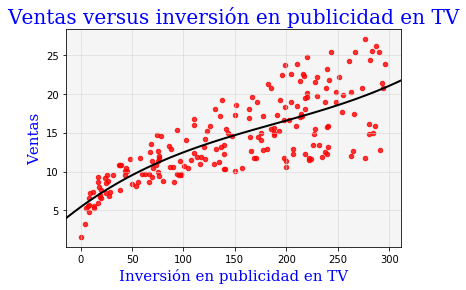

In [66]:
fig = sns.regplot(x="TV",y="sales",data=Advertising,order=3,marker="o",
                  scatter_kws={"s":20,"color":"red"},line_kws={"ls":"solid","lw":2,"color":"black"},ci=None)
plt.xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"blue","size":15})
plt.ylabel("Ventas",fontdict={"family":"serif","color":"blue","size":15})
plt.title("Ventas versus inversión en publicidad en TV",
          fontdict={"family":"serif","color":"blue","size":20},loc="center")
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
fig.patch.set_facecolor("whitesmoke")
plt.show(fig)

In [67]:
cats = 3
bins = Advertising["radio"].quantile(np.arange(0,cats+1)/cats) 
Advertising["radioC"] = pd.cut(Advertising["radio"],bins,labels=["Baja","Media","Alta"])

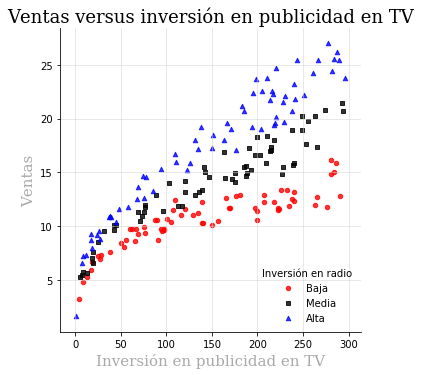

In [68]:
fig = sns.lmplot(x="TV",y="sales",data=Advertising,order=3,hue="radioC",markers=["o","s","^"],
                 palette=dict(Baja="red",Media="black",Alta="blue"),
                 scatter_kws={"s":20},ci=None,legend=False,fit_reg=False,
                 line_kws={"ls":"solid","lw":2})
plt.legend(loc='lower right',title="Inversión en radio",frameon=False,ncol=1)
plt.xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":15})
plt.ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":15})
plt.title("Ventas versus inversión en publicidad en TV",
          fontdict={"family":"serif","color":"black","size":18},loc="center")
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
plt.show(fig)

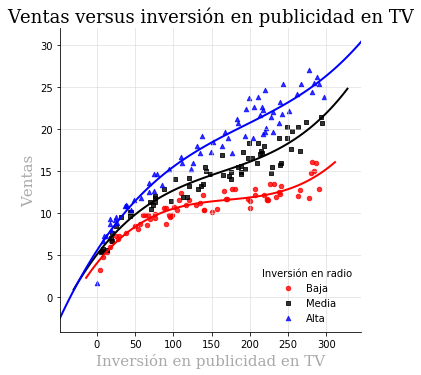

In [69]:
fig = sns.lmplot(x="TV",y="sales",data=Advertising,order=3,hue="radioC",markers=["o","s","^"],
                 palette=dict(Baja="red",Media="black",Alta="blue"),
                 scatter_kws={"s":20},ci=None,legend=False,
                 line_kws={"ls":"solid","lw":2})
plt.legend(loc='lower right',title="Inversión en radio",frameon=False,ncol=1)
plt.xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":15})
plt.ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":15})
plt.title("Ventas versus inversión en publicidad en TV",
          fontdict={"family":"serif","color":"black","size":18},loc="center")
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
plt.show(fig)

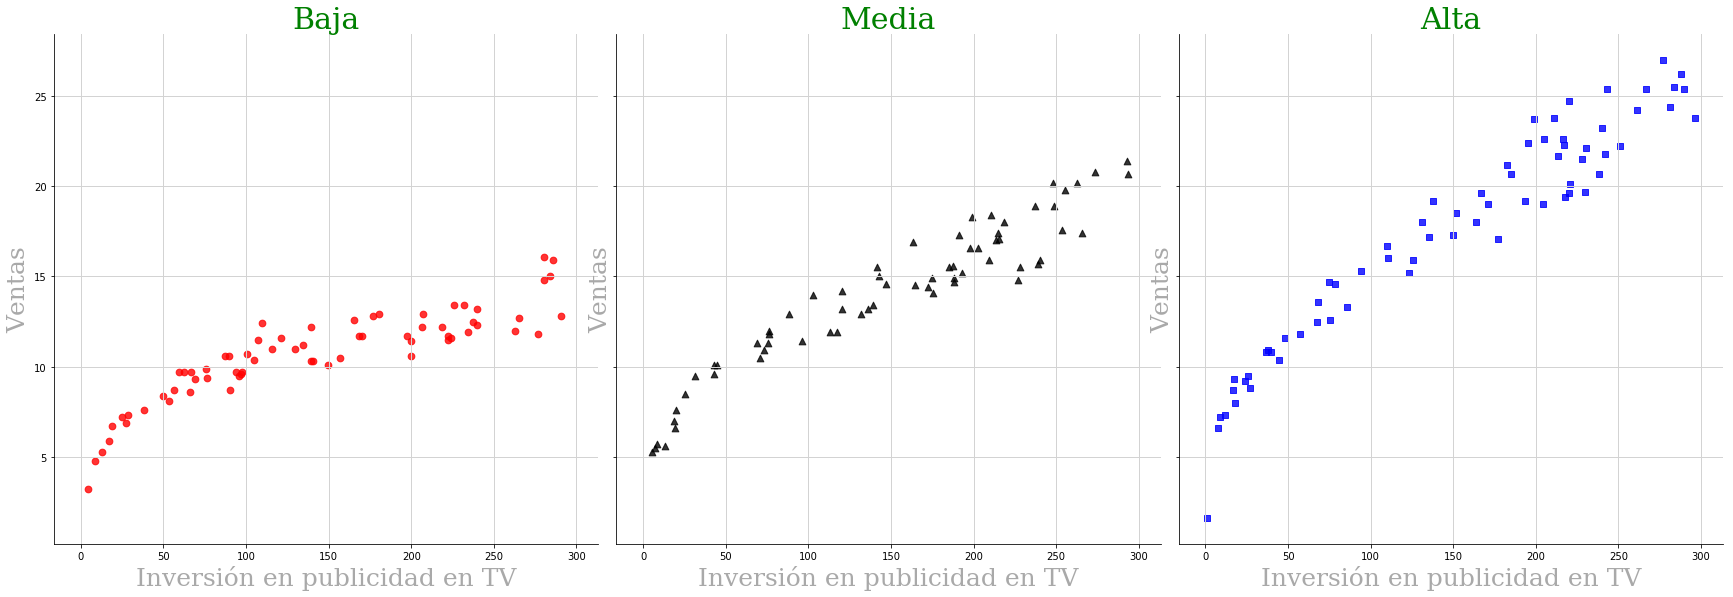

In [70]:
g = sns.FacetGrid(data=Advertising,col="radioC",hue="radioC",sharey=True,height=8,
                  hue_kws=dict(marker=["o","^","s"],color=["red","black","blue"]))
g.map(sns.regplot,"TV","sales",order=3,scatter_kws={"s":45},line_kws={"ls":"solid","lw":1},ci=None,fit_reg=False)
axes = g.axes.flatten()
titulos = ["Baja","Media","Alta"]
for ax in np.arange(0,len(titulos)):
    axes[ax].set_xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_title(titulos[ax],fontdict={"family":"serif","color":"green","size":30},loc="center")
    axes[ax].grid(axis="both",color="lightgray",ls="solid",lw=1)

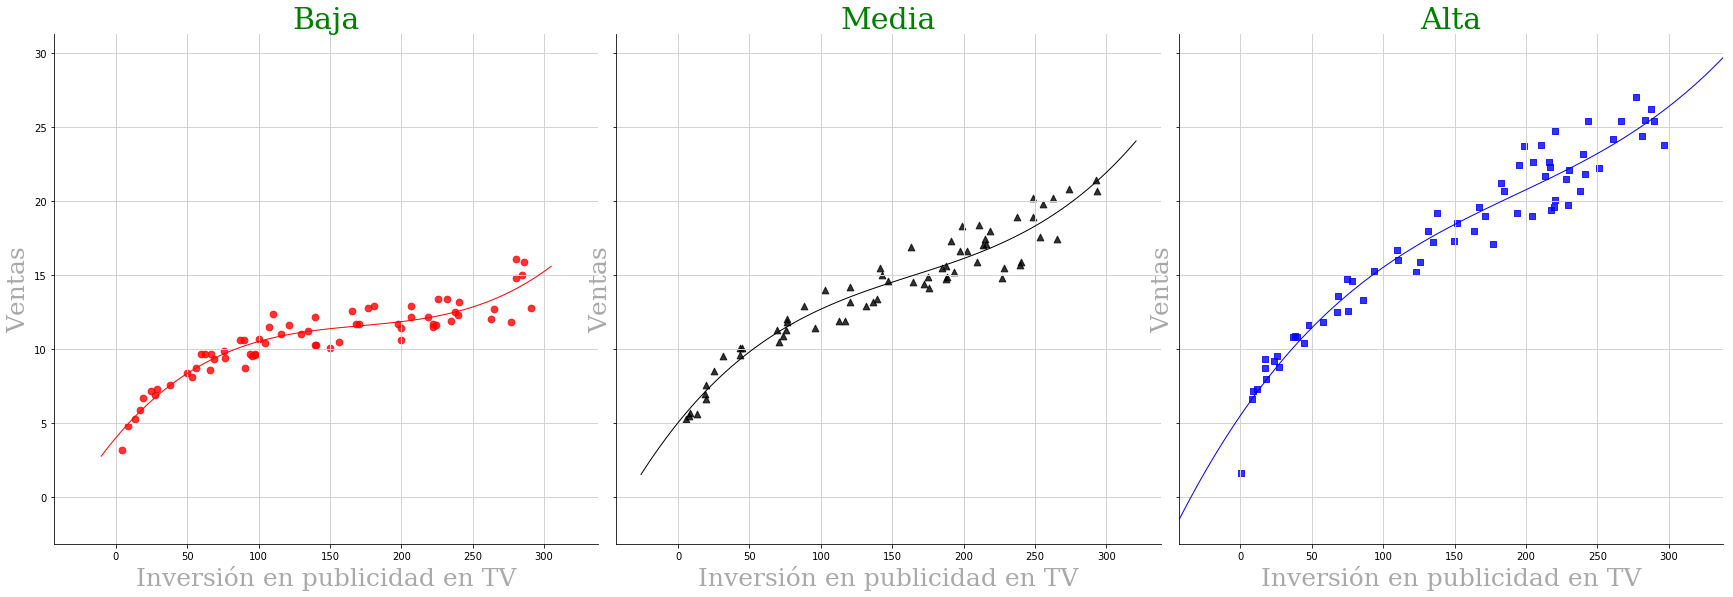

In [71]:
g = sns.FacetGrid(data=Advertising,col="radioC",hue="radioC",sharey=True,height=8,
                  hue_kws=dict(marker=["o","^","s"],color=["red","black","blue"]))
g.map(sns.regplot,"TV","sales",order=3,scatter_kws={"s":45},line_kws={"ls":"solid","lw":1},ci=None)
axes = g.axes.flatten()
titulos = ["Baja","Media","Alta"]
for ax in np.arange(0,len(titulos)):
    axes[ax].set_xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_title(titulos[ax],fontdict={"family":"serif","color":"green","size":30},loc="center")
    axes[ax].grid(axis="both",color="lightgray",ls="solid",lw=1)

In [72]:
cats = 3
bins = Advertising["TV"].quantile(np.arange(0,cats+1)/cats) 
Advertising["TVC"] = pd.cut(Advertising["TV"],bins,labels=["Baja","Media","Alta"])

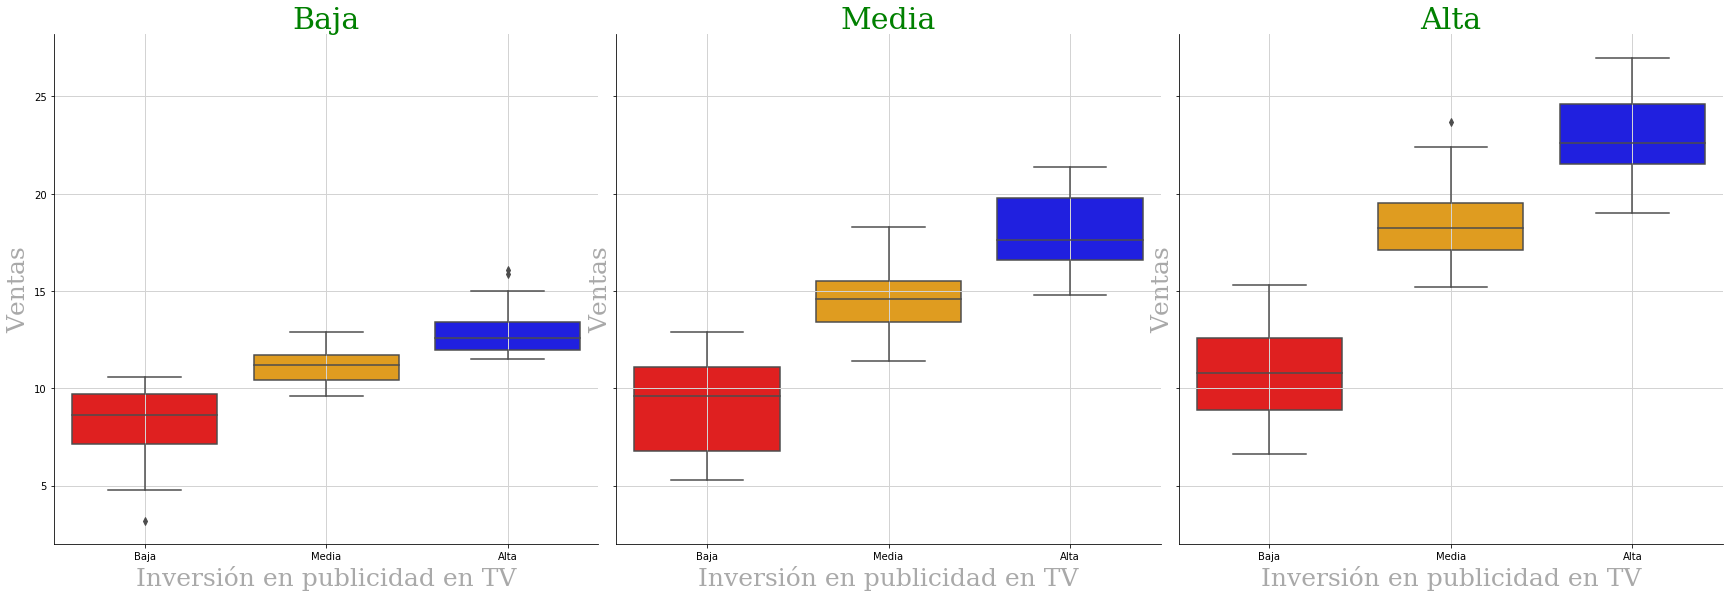

In [73]:
g = sns.FacetGrid(data=Advertising,col="radioC",sharey=True,height=8)
g.map(sns.boxplot,"TVC","sales",order=titulos,palette=dict(Baja="red",Media="orange",Alta="blue"),linewidth=1.5)
axes = g.axes.flatten()
for ax in np.arange(0,len(titulos)):
    axes[ax].set_xlabel("Inversión en publicidad en TV",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_ylabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_title(titulos[ax],fontdict={"family":"serif","color":"green","size":30},loc="center")
    axes[ax].grid(axis="both",color="lightgray",ls="solid",lw=1)

C:\Users\mquin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


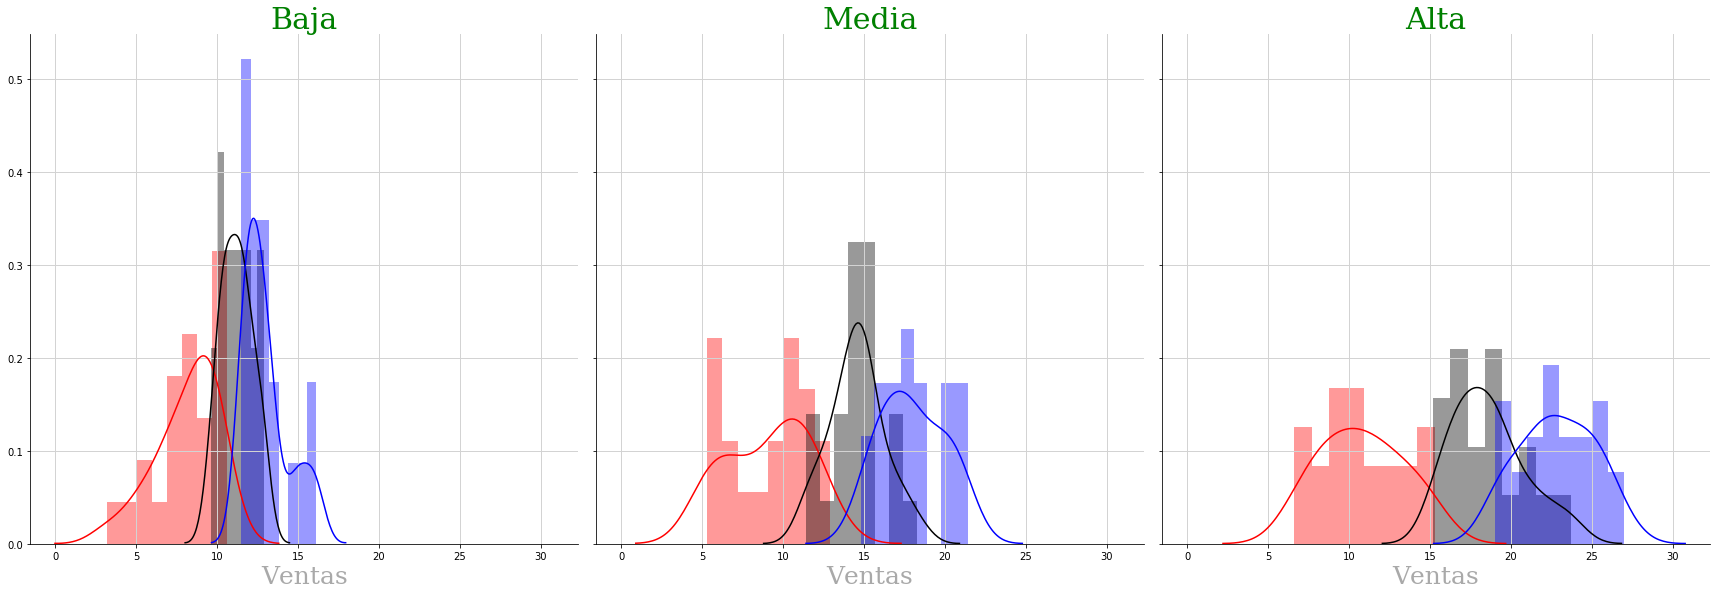

In [74]:
g = sns.FacetGrid(data=Advertising,col="radioC",hue="TVC",sharey=True,height=8,
                 hue_kws=dict(color=["red","black","blue"]))
g.map(sns.distplot,"sales",norm_hist=True,kde=True,bins=8)
axes = g.axes.flatten()
for ax in np.arange(0,len(titulos)):
    axes[ax].set_xlabel("Ventas",fontdict={"family":"serif","color":"darkgrey","size":25})
    axes[ax].set_title(titulos[ax],fontdict={"family":"serif","color":"green","size":30},loc="center")
    axes[ax].grid(axis="both",color="lightgray",ls="solid",lw=1)

In [75]:
#sns.get_dataset_names()
cars = sns.load_dataset("mpg")
cars.loc[cars["origin"]=="usa","Origen"] = "Estados Unidos"
cars.loc[cars["origin"]!="usa","Origen"] = "Japón y Europa"

C:\Users\mquin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mquin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


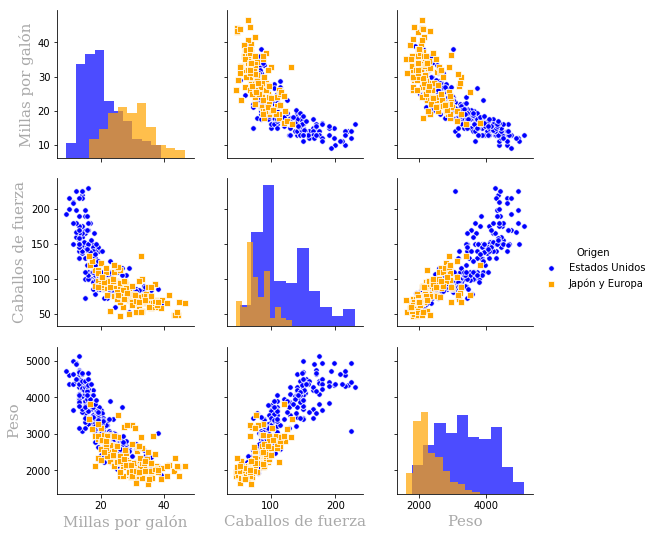

In [76]:
fig = sns.pairplot(cars, vars=["mpg","horsepower","weight"],hue="Origen",kind="scatter",
                   diag_kind="hist",palette=["blue","orange"],
                   markers=["o", "s"],plot_kws={"s":30},diag_kws={"alpha":0.7})
axes = fig.axes.flatten()
titulos = ["Millas por galón","Caballos de fuerza","Peso"]
c = np.sqrt(len(axes))
for ax1 in np.arange(0,c):
    for ax2 in np.arange(0,c):
        ax = int(ax1*c + ax2)
        if ax2 == 0: axes[ax].set_ylabel(titulos[int(ax1)],fontdict={"family":"serif","color":"darkgrey","size":15})
        if ax1 == c-1: axes[ax].set_xlabel(titulos[int(ax2)],fontdict={"family":"serif","color":"darkgrey","size":15})
plt.show(fig)

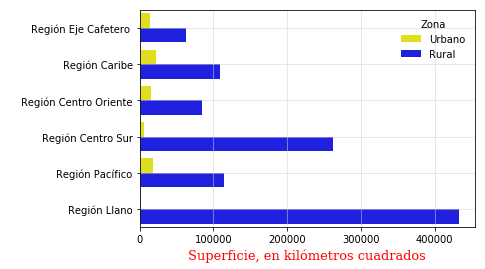

In [77]:
fig=sns.barplot(y="Region",x="Superficie",hue="Zona",data=Municipios,estimator=sum,ci=None,
                palette=dict(Rural="blue",Urbano="yellow"))
plt.xlabel("Superficie, en kilómetros cuadrados",fontdict={"family":"serif","color":"red","size":13})
plt.ylabel(" ")
plt.legend(loc='upper right',title="Zona",frameon=False,ncol=1)
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
plt.show(fig)

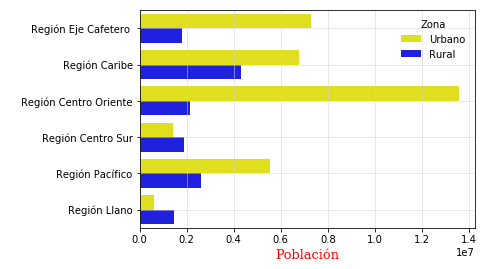

In [78]:
fig=sns.barplot(y="Region",x="Poblacion",hue="Zona",data=Municipios,estimator=sum,ci=None,
                palette=dict(Rural="blue",Urbano="yellow"))
plt.xlabel("Población",fontdict={"family":"serif","color":"red","size":13})
plt.ylabel(" ")
plt.legend(loc='upper right',title="Zona",frameon=False,ncol=1)
plt.grid(axis="both",color="lightgray",ls="solid",lw=0.5)
plt.show(fig)